# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
import joblib

In [2]:
pd.set_option('display.max_columns', None) 
Departures = pd.read_csv('Total Departures.csv')
Arrival = pd.read_csv('Total Arrival.csv')
# Departures. 1st dataset
# Arrival.  2nd dataset

In [3]:
df = pd.concat([Departures, Arrival]) # joining both datasets together
df.head(10)

,callsign,cid,name,latitude,longitude,altitude,ground_speed,heading,transponder,aircraft,departure,nm_from_dep,arrival,nm_from_arr,alternate,route,flight_rules,filed_altitude,filed_tas,filed_time_enroute,filed_fuel_onboard,remarks,stage_of_flight,time_logon
0,WWA3592,813973,Chris Cramblet KDFW,37.89221,-79.11392,33988,413,233,1200,B739/W,KALB,379.27,KATL,363.40,NaN,ALB7.PWL SAX J77 EMI J48 SPA2 J53 SPA.WHINZ4,IFR,34000,460,1:57,5:30,Charts as Filed - ActiveSky - Fly www.flywestw...,Cruise,2020-03-02 19:08:42
1,DAL2264,1111236,Lonz EGLL,32.50932,-83.97112,28466,492,171,2000,MD88/L,KATL,71.44,KMCO,280.84,KMIA,SMLTZ2 WALET DCT YUESS DCT OTK PIGLT6,IFR,33000,448,1:19,2:35,OPR/DAL /v/,Climb,2020-03-02 19:08:42
2,DAL446,1322705,Jack Adderley MYNN,43.56900,-79.45749,8976,265,9,1200,B737,KATL,639.62,CYYZ,9.93,CYTR,SMKEY2 BOBBD Q71 GEFFS EWC OXMAN LINNG2,IFR,FL350,450,1:43,3:22,/L NAV/GPSRNAV,Descent,2020-03-02 19:08:42
3,AAL2464,1083694,Richard Shaw TTPP,30.28852,-96.07990,27516,530,103,5322,A319,KAUS,82.19,KMIA,877.71,KMCO,ILEXY2 ZENZI IAH J86 LEV Q102 BLVNS Y290 BAGGS...,IFR,FL370,438,2:3,3:44,/L NAV/GPSRNAV,Climb,2020-03-02 19:08:42
4,AAY339,816206,816206,37.54890,-119.60616,36165,500,172,2211,A319/L,KBOI,392.44,KLAX,224.12,NaN,HYVAL REO J7 FMG J7 REBRG IRNMN2,IFR,36000,450,0:0,0:0,/v/ SEL/MBSM,Cruise,2020-03-02 19:08:42
5,DAL202,1358097,Christopher Windust,41.18341,-77.38996,35997,412,240,1200,B738/L,KBOS,294.30,KCVG,357.54,NaN,REVSS4 REVSS CTR HNK J49 MAGIO J49 PSB MAULL K...,IFR,36000,450,2:40,3:0,New to Vatsim / Airac 2003 /v/,Climb,2020-03-02 19:08:42
6,TUI001,1474244,Mischa Lueckert EDDV,53.09648,-36.42069,32598,499,90,2000,H/B763/C,KBOS,1517.92,EGLL,1309.64,EGBB,LBSTA6 LBSTA DCT EBONY N439A TUDEP NATT GISTI ...,IFR,35000,450,5:34,7:0,/v/,Cruise,2020-03-02 19:08:42
7,DAL979,1317425,Thiago Fontes SBGR,37.46615,-79.57410,36030,398,237,2000,B737/L,KBWI,170.96,KATL,329.99,KBNA,TERPZ6 FLASK OZZZI1,IFR,36000,448,1:34,3:29,PBN/A1B1C1D1S1S2 DOF/200302 REG/N714SB EET/KZT...,Cruise,2020-03-02 19:08:42
8,SWA2364,1361598,Kostas Alamanas KVRB,39.17649,-76.66458,149,14,213,2000,B738,KBWI,0.18,KJAX,576.49,KMCO,CONLE3 COLIN J61 HUBBS J193 HCM ISO J121 CHS E...,IFR,28000,0,2:12,4:30,/v/,Taxi for Departure,2020-03-02 19:08:42
9,DAL979,1317425,Thiago Fontes SBGR,37.46615,-79.57410,36030,398,237,2000,B737/L,KBWI,170.96,KATL,329.99,KBNA,TERPZ6 FLASK OZZZI1,IFR,36000,448,1:34,3:29,PBN/A1B1C1D1S1S2 DOF/200302 REG/N714SB EET/KZT...,Cruise,2020-03-02 19:08:42


In [4]:
# Getting an overview and summary of the dataset

In [5]:
df.shape

(203, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 98
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   callsign            203 non-null    object 
 1   cid                 203 non-null    int64  
 2   name                203 non-null    object 
 3   latitude            203 non-null    float64
 4   longitude           203 non-null    float64
 5   altitude            203 non-null    int64  
 6   ground_speed        203 non-null    int64  
 7   heading             203 non-null    int64  
 8   transponder         203 non-null    int64  
 9   aircraft            203 non-null    object 
 10  departure           203 non-null    object 
 11  nm_from_dep         203 non-null    float64
 12  arrival             203 non-null    object 
 13  nm_from_arr         201 non-null    float64
 14  alternate           157 non-null    object 
 15  route               199 non-null    object 
 16  flight_rules  

In [7]:
df.columns

Index(['callsign', 'cid', 'name', 'latitude', 'longitude', 'altitude',
       'ground_speed', 'heading', 'transponder', 'aircraft', 'departure',
       'nm_from_dep', 'arrival', 'nm_from_arr', 'alternate', 'route',
       'flight_rules', 'filed_altitude', 'filed_tas', 'filed_time_enroute',
       'filed_fuel_onboard', 'remarks', 'stage_of_flight', 'time_logon'],
      dtype='object')

In [8]:
df.isnull().sum()

callsign               0
cid                    0
name                   0
latitude               0
longitude              0
altitude               0
ground_speed           0
heading                0
transponder            0
aircraft               0
departure              0
nm_from_dep            0
arrival                0
nm_from_arr            2
alternate             46
route                  4
flight_rules           0
filed_altitude         0
filed_tas              0
filed_time_enroute     0
filed_fuel_onboard     0
remarks                3
stage_of_flight        2
time_logon             0
dtype: int64

In [9]:
df.dtypes

callsign               object
cid                     int64
name                   object
latitude              float64
longitude             float64
altitude                int64
ground_speed            int64
heading                 int64
transponder             int64
aircraft               object
departure              object
nm_from_dep           float64
arrival                object
nm_from_arr           float64
alternate              object
route                  object
flight_rules           object
filed_altitude         object
filed_tas               int64
filed_time_enroute     object
filed_fuel_onboard     object
remarks                object
stage_of_flight        object
time_logon             object
dtype: object

In [10]:
# getting an overview of the available aircraft so as to see the unique aircraft codes we would be looking to extract for Boeing Aircraft

In [11]:
df['aircraft'].unique() # aircraft types overview

array(['B739/W', 'MD88/L', 'B737', 'A319', 'A319/L', 'B738/L', 'H/B763/C',
       'B737/L', 'B738', 'H/B763/X', 'A321/L', 'T/B738-300/F', 'TBM9/L',
       'MD83/L', 'B752/L', 'C172/G', 'B752', 'B739', 'E75L/L', 'H/A359',
       'T/A319/F', 'C208/C', 'B752/P', 'A321', 'B789/L', 'H/B789/L',
       'H/B788/L', 'H/B77W/L', 'H/B748/H', 'B/B773/F', 'B739/L', 'AT72/L',
       'A320/L', 'BE20/L', 'AT75', 'H/MD11/L', 'A321/X', 'H/B744/RSJM',
       'H/A333/L', 'A320/X', 'H/B772/Z', 'H/B789', 'CRJ7/L', 'H/B763/L',
       'H/A319/L', 'A21N', 'GLEX/G', 'BE30/G', 'B737/X', 'H/B748/L',
       'B738/A', 'B77L/L', 'B722/W', 'H/B77L/L', 'KODI/G', 'B763/L',
       'H/B772', 'T/B738/L', 'BE58/G', 'BE60/G', 'C340/L', 'H/B744/L',
       'H/B752', 'B752/Z', 'B763', 'B78X/Z', 'B772', 'H/B772/L',
       'H/B748/C', 'A319/G', 'A333/L', 'H/A333', 'A332', 'T/A321/L'],
      dtype=object)

In [12]:
df.groupby(['aircraft']).count()

,callsign,cid,name,latitude,longitude,altitude,ground_speed,heading,transponder,departure,nm_from_dep,arrival,nm_from_arr,alternate,route,flight_rules,filed_altitude,filed_tas,filed_time_enroute,filed_fuel_onboard,remarks,stage_of_flight,time_logon
aircraft,,,,,,,,,,,,,,,,,,,,,,,
A21N,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
A319,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
A319/G,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A319/L,7,7,7,7,7,7,7,7,7,7,7,7,7,5,7,7,7,7,7,7,7,7,7
A320/L,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T/A319/F,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,0,2,2
T/A321/L,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
T/B738-300/F,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


## Extracting the data that has Boeing Airplane

In [71]:
# Noticed that ,in the dataset, the aircrafts having B in them are for the boeing airline. 
# So let's filter out for boeing airline and create a new dataset

In [14]:
condition = df['aircraft'].str.contains('B')
Boeing_df=df[condition]
Boeing_df

,callsign,cid,name,latitude,longitude,altitude,ground_speed,heading,transponder,aircraft,departure,nm_from_dep,arrival,nm_from_arr,alternate,route,flight_rules,filed_altitude,filed_tas,filed_time_enroute,filed_fuel_onboard,remarks,stage_of_flight,time_logon
0,WWA3592,813973,Chris Cramblet KDFW,37.89221,-79.11392,33988,413,233,1200,B739/W,KALB,379.27,KATL,363.40,NaN,ALB7.PWL SAX J77 EMI J48 SPA2 J53 SPA.WHINZ4,IFR,34000,460,1:57,5:30,Charts as Filed - ActiveSky - Fly www.flywestw...,Cruise,2020-03-02 19:08:42
2,DAL446,1322705,Jack Adderley MYNN,43.56900,-79.45749,8976,265,9,1200,B737,KATL,639.62,CYYZ,9.93,CYTR,SMKEY2 BOBBD Q71 GEFFS EWC OXMAN LINNG2,IFR,FL350,450,1:43,3:22,/L NAV/GPSRNAV,Descent,2020-03-02 19:08:42
5,DAL202,1358097,Christopher Windust,41.18341,-77.38996,35997,412,240,1200,B738/L,KBOS,294.30,KCVG,357.54,NaN,REVSS4 REVSS CTR HNK J49 MAGIO J49 PSB MAULL K...,IFR,36000,450,2:40,3:0,New to Vatsim / Airac 2003 /v/,Climb,2020-03-02 19:08:42
6,TUI001,1474244,Mischa Lueckert EDDV,53.09648,-36.42069,32598,499,90,2000,H/B763/C,KBOS,1517.92,EGLL,1309.64,EGBB,LBSTA6 LBSTA DCT EBONY N439A TUDEP NATT GISTI ...,IFR,35000,450,5:34,7:0,/v/,Cruise,2020-03-02 19:08:42
7,DAL979,1317425,Thiago Fontes SBGR,37.46615,-79.57410,36030,398,237,2000,B737/L,KBWI,170.96,KATL,329.99,KBNA,TERPZ6 FLASK OZZZI1,IFR,36000,448,1:34,3:29,PBN/A1B1C1D1S1S2 DOF/200302 REG/N714SB EET/KZT...,Cruise,2020-03-02 19:08:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,UPS3116,834265,834265,54.15176,-113.65211,32597,550,121,2000,H/B763/L,PANC,1221.24,KSDF,1487.96,KCVG,TED YESKA NCA11 YWV J475 VLN J483 CFHLT/N0455F...,IFR,33000,450,5:38,7:3,+VFPS+/T/PBN/A1B1C1D1L1O1 DOF/200302 REG/N618S...,Climb,2020-03-02 19:08:42
93,AAL835,916435,Michael Martin KGSP,37.46323,-88.50023,33869,370,303,2200,B738/L,KMCO,651.39,KSEA,1596.76,KPDX,JAG6 MATEO SHRKS DBN GQO BNA/N0462F340 KK51K I...,IFR,32000,472,6:19,7:44,PBN/A1B1C1D1S1S2 NAV/RNVD1E2A1 DAT/V DOF/20030...,Cruise,2020-03-02 19:08:42
95,ASA1340,1043972,Casey Crebs KPDX,37.50245,-122.14433,3019,142,339,2000,B738,KPHX,551.88,KSFO,13.01,KSTS,N0449F320 CHILY4 HOBES J92 PRFUM Q13 TUMBE Q16...,IFR,36000,449,1:31,3:25,PBN/A1B1C1D1L1O1S1 NAV/RNVD1E2A1 DOF/200302 RE...,Descent,2020-03-02 19:08:42
96,WJA209,831734,David Paton CYVR,45.22914,-123.35009,37430,507,185,2000,T/B738/L,CYVR,238.00,KSFO,458.74,KOAK,YVR V300 YYJ J589 ELMAA Q1 ETCHY MLBEC.BDEGA3,IFR,FL370,458,1:41,2:31,/V/ALL PLATES AND CHARTS,Climb,2020-03-02 19:08:42


In [15]:
Boeing_df.columns # having an overview of the features for the dataset 

Index(['callsign', 'cid', 'name', 'latitude', 'longitude', 'altitude',
       'ground_speed', 'heading', 'transponder', 'aircraft', 'departure',
       'nm_from_dep', 'arrival', 'nm_from_arr', 'alternate', 'route',
       'flight_rules', 'filed_altitude', 'filed_tas', 'filed_time_enroute',
       'filed_fuel_onboard', 'remarks', 'stage_of_flight', 'time_logon'],
      dtype='object')

In [16]:
Boeing_df['index']=range(132)
Boeing_df.set_index('index',inplace=True)

C:\Users\Mubaraq\AppData\Local\Temp\ipykernel_14956\3720875815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boeing_df['index']=range(132)


## Data exploration for the dataset containing Boeing Aircrafts

<Axes: >

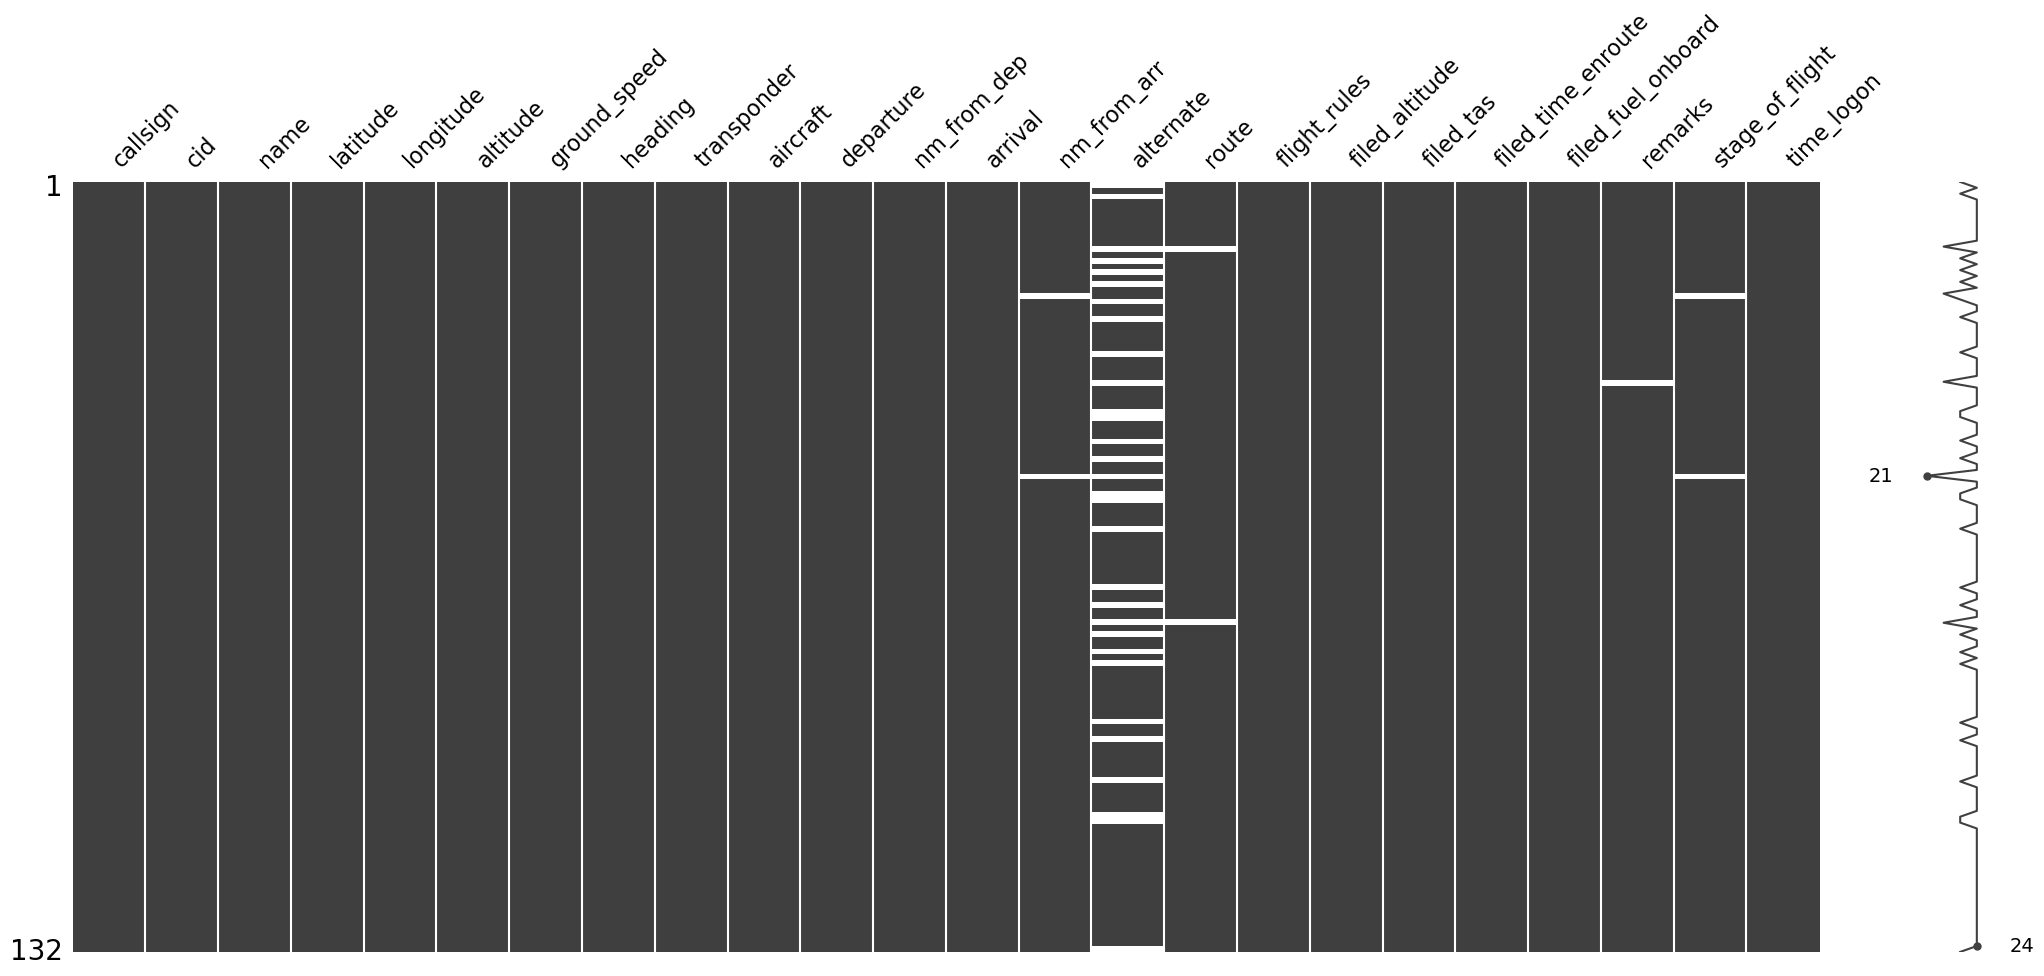

In [17]:
ms.matrix(Boeing_df) # chekcking for null values towards the consideration of looking at the relevant features 
# we would be working with, with inclusion of domain knowledge in feature selection

In [18]:
Boeing_df.isnull().sum() # viewing the number of null values in each of the columns

callsign               0
cid                    0
name                   0
latitude               0
longitude              0
altitude               0
ground_speed           0
heading                0
transponder            0
aircraft               0
departure              0
nm_from_dep            0
arrival                0
nm_from_arr            2
alternate             30
route                  2
flight_rules           0
filed_altitude         0
filed_tas              0
filed_time_enroute     0
filed_fuel_onboard     0
remarks                1
stage_of_flight        2
time_logon             0
dtype: int64

In [19]:
# now we are done retrieving the necessary data. Let's commence feature extraction and cleaning the data

In [20]:
Boeing_df.columns

Index(['callsign', 'cid', 'name', 'latitude', 'longitude', 'altitude',
       'ground_speed', 'heading', 'transponder', 'aircraft', 'departure',
       'nm_from_dep', 'arrival', 'nm_from_arr', 'alternate', 'route',
       'flight_rules', 'filed_altitude', 'filed_tas', 'filed_time_enroute',
       'filed_fuel_onboard', 'remarks', 'stage_of_flight', 'time_logon'],
      dtype='object')

In [21]:
# selecting the relevant features. 'Filed altitude' column was also removed due to its multicollinearity effects

In [22]:
X=Boeing_df[['latitude', 'longitude', 'altitude',
         'heading','filed_tas', 'filed_time_enroute']]
Y=Boeing_df[['ground_speed']]

In [23]:
X

,latitude,longitude,altitude,heading,filed_tas,filed_time_enroute
index,,,,,,
0,37.89221,-79.11392,33988,233,460,1:57
1,43.56900,-79.45749,8976,9,450,1:43
2,41.18341,-77.38996,35997,240,450,2:40
3,53.09648,-36.42069,32598,90,450,5:34
4,37.46615,-79.57410,36030,237,448,1:34
...,...,...,...,...,...,...
127,54.15176,-113.65211,32597,121,450,5:38
128,37.46323,-88.50023,33869,303,472,6:19
129,37.50245,-122.14433,3019,339,449,1:31


In [24]:
Y

,ground_speed
index,
0,413
1,265
2,412
3,499
4,398
...,...
127,550
128,370
129,142


In [25]:
Y.dtypes

ground_speed    int64
dtype: object

In [26]:
X.dtypes

latitude              float64
longitude             float64
altitude                int64
heading                 int64
filed_tas               int64
filed_time_enroute     object
dtype: object

In [27]:
print(f'X dataset size is {X.shape} and Y dataset size is {Y.shape}')

X dataset size is (132, 6) and Y dataset size is (132, 1)


In [28]:
# The time_logon which indicates the flight time duration appears to be in hour and minutes. Let's convert to strictly hour for easy scaling

In [29]:
X['filed_time_enroute']=round(X['filed_time_enroute'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1])/60),2)
X['filed_time_enroute']

C:\Users\Mubaraq\AppData\Local\Temp\ipykernel_14956\276689176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['filed_time_enroute']=round(X['filed_time_enroute'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1])/60),2)


index
0      1.95
1      1.72
2      2.67
3      5.57
4      1.57
       ... 
127    5.63
128    6.32
129    1.52
130    1.68
131    2.50
Name: filed_time_enroute, Length: 132, dtype: float64

In [30]:
X['filed_time_enroute']=round(X['filed_time_enroute'],2)

C:\Users\Mubaraq\AppData\Local\Temp\ipykernel_14956\1627146334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['filed_time_enroute']=round(X['filed_time_enroute'],2)


In [31]:
X['filed_time_enroute'].dtypes

dtype('float64')

In [32]:
X.describe()

,latitude,longitude,altitude,heading,filed_tas,filed_time_enroute
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,37.933352,-87.214055,24641.742424,186.969697,417.030303,3.290227
std,9.773525,31.562466,14652.670478,99.909344,98.600585,3.047075
min,-3.743200,-177.702470,12.000000,0.000000,0.000000,0.000000
25%,33.265710,-105.279320,8952.000000,101.750000,417.500000,1.420000
50%,38.933040,-85.445290,33445.000000,183.500000,450.000000,2.270000
75%,42.373280,-76.664580,36005.250000,262.000000,463.500000,4.102500
max,62.796730,165.927260,42000.000000,358.000000,560.000000,15.000000


In [33]:
Y.describe()

,ground_speed
count,132.000000
mean,360.575758
std,180.798573
min,0.000000
25%,274.000000
50%,412.000000
75%,489.000000
max,643.000000


In [34]:
# checking the correlation of each of the relevant features against the target variable to see the most relevant features for prediction 
# and also to detect for multicollinearities between the X features

In [35]:
Corr=X.join(Y) # joining the dataset to view in its correlation matrix
Corr.corr()

,latitude,longitude,altitude,heading,filed_tas,filed_time_enroute,ground_speed
latitude,1.000000,0.132281,-0.063491,-0.083980,-0.092545,0.175825,-0.033504
longitude,0.132281,1.000000,0.037101,0.008391,-0.034273,0.303080,0.006320
altitude,-0.063491,0.037101,1.000000,0.177129,0.537593,0.367451,0.904279
heading,-0.083980,0.008391,0.177129,1.000000,0.142129,0.173860,0.004148
filed_tas,-0.092545,-0.034273,0.537593,0.142129,1.000000,0.324204,0.550439
filed_time_enroute,0.175825,0.303080,0.367451,0.173860,0.324204,1.000000,0.317955
ground_speed,-0.033504,0.006320,0.904279,0.004148,0.550439,0.317955,1.000000


[]

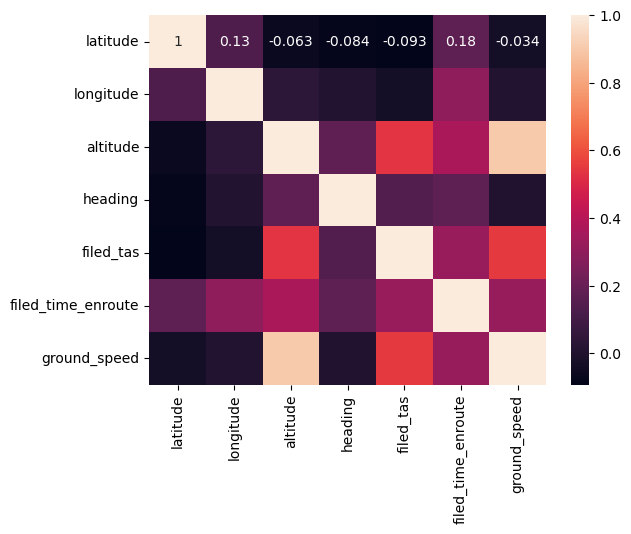

In [36]:
correlation_matrix=Corr.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.plot()

No multicollinearity found.

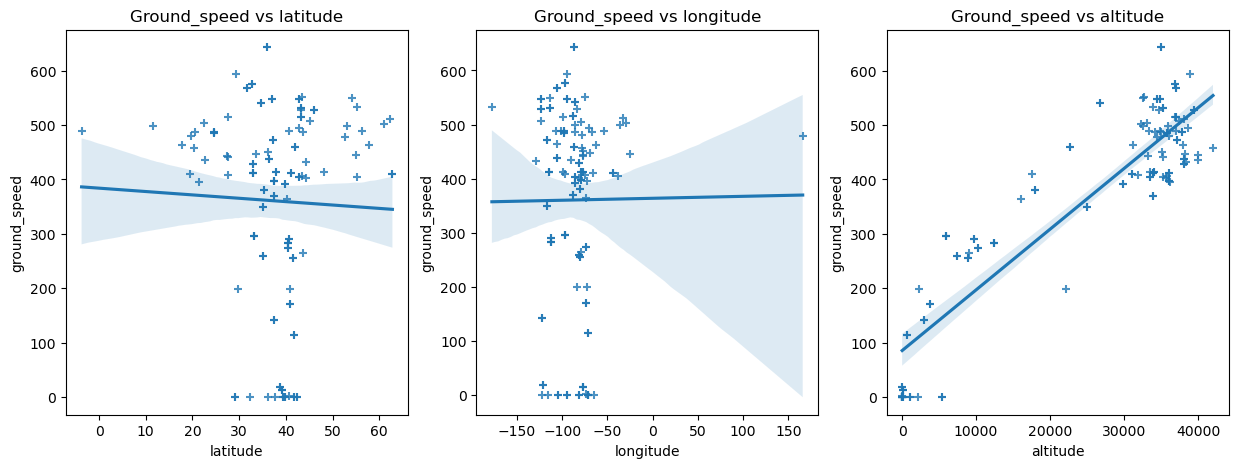

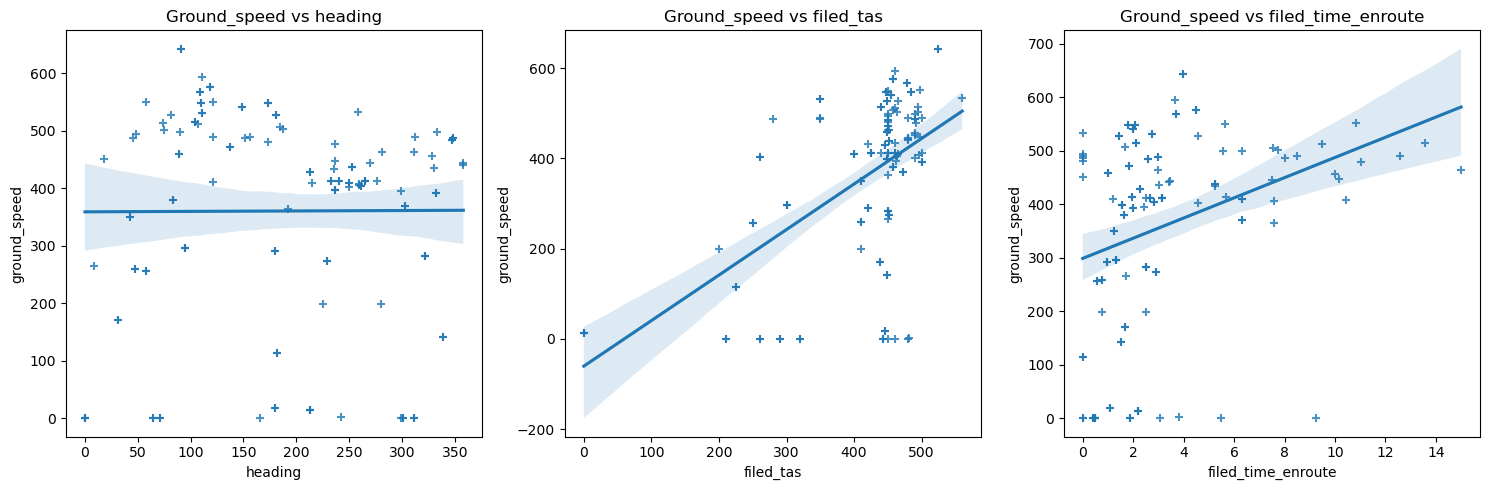

In [37]:
# An overview of the target variables to each of the features
# Scatter plot for the features vs Ground speed
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

for j,i in zip(X.columns,range(3)):
    sns.regplot(x=X[j], y=Y,marker='+', ax=axs[i])
    axs[i].set_title(f'Ground_speed vs {j}')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

for j,i in zip(X.columns[3:6],range(3)):
    sns.regplot(x=X[j], y=Y,marker='+', ax=axs[i-3])
    axs[i-3].set_title(f'Ground_speed vs {j}')

# Adjust layout
plt.tight_layout()
plt.show()

In [38]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=22)

In [39]:
X_train

,latitude,longitude,altitude,heading,filed_tas,filed_time_enroute
index,,,,,,
4,37.46615,-79.57410,36030,237,448,1.57
76,37.03123,-94.21953,34872,110,447,2.07
36,42.73023,-70.30596,38564,48,450,0.00
43,22.53381,-79.10226,33134,187,495,7.53
15,40.34008,-111.88142,12443,322,450,2.50
...,...,...,...,...,...,...
118,46.03685,-123.10462,39448,181,449,1.45
102,35.04831,-116.46718,25032,43,410,1.25
100,43.27697,-88.21099,36939,104,440,2.13


From our dataset, some values in the columns are large in comparison to the others which leads to lots of time taken for it to converge to its global minima. So let's employ normalization using the sklearn library

## Data Preprocessing /Standardization/ Feature Engineering

In [40]:
# normalizing the features because their different ranges and to lead to converging faster and improve model performance.

In [41]:

# this because certain machine learning algorithms are sensitive to the scale of input features If the features have different scales.....
# .....features with larger scales may dominate the prediction process, leading to inaccurate results and we need to prevent that :)

In [42]:
# Standardize the features
scaler= StandardScaler()

In [43]:
X_train_scaled=scaler.fit_transform(X_train)

In [44]:
X_test_scaled=scaler.transform(X_test)

In [45]:
pd.reset_option('display.max_columns') 
X_train_scaled[:5]

array([[-0.07443381,  0.20571965,  0.79719667,  0.49997604,  0.33155259,
        -0.50110736],
       [-0.12027393, -0.21676876,  0.71931464, -0.73697768,  0.3212404 ,
        -0.33765971],
       [ 0.48039477,  0.47308509,  0.96762245, -1.34084485,  0.35217698,
        -1.01433295],
       [-1.64828699,  0.2193312 ,  0.60242435,  0.01298639,  0.81622561,
         1.44718854],
       [ 0.22847543, -0.7262754 , -0.789162  ,  1.32785845,  0.35217698,
        -0.19709474]])

In [46]:
X_test_scaled[:5]

array([[ 0.48799193,  0.03888476,  0.62334085,  0.73373108, -1.60713947,
        -0.0892193 ],
       [ 0.10583425,  0.2896529 , -1.61600278,  0.26622101, -4.28830936,
        -0.29516333],
       [ 0.22847543, -0.7262754 , -0.789162  ,  1.32785845,  0.35217698,
        -0.19709474],
       [ 0.37445405,  0.44045332, -1.62178676,  1.1233228 ,  0.27999163,
        -0.40303877],
       [-0.3709327 ,  0.03634875,  0.17124847, -0.35712575,  0.39342574,
        -0.36054238]])

## Using the Linear Regression model 

In [47]:
Lr=LinearRegression()

In [48]:
X_train.columns

Index(['latitude', 'longitude', 'altitude', 'heading', 'filed_tas',
       'filed_time_enroute'],
      dtype='object')

In [49]:
Lr.fit(X_train_scaled,Y_train) # i.e. getting your weight and bias

LinearRegression()

In [50]:
Lr.intercept_ # getting the value of the intercept for the model based on the training dataset

array([348.97979798])

In [51]:
Lr.coef_ # getting the value of the coefficient for the model based on the training dataset

array([[  6.11670562,  -3.55764447, 159.77662418, -24.61482612,
         21.39676844,  -2.73954955]])

In [52]:
X_train_scaled.shape

(99, 6)

In [53]:
Y_pred_train = Lr.predict(X_train_scaled)
Y_pred_train[:10]

array([[471.32616239],
       [489.88408855],
       [548.15753827],
       [447.55102591],
       [202.26189979],
       [ 99.39866185],
       [489.88408855],
       [200.1838256 ],
       [ 96.79797369],
       [432.65441851]])

In [54]:
mean_squared_error(Y_train, Y_pred_train) # check for errors

4885.029823950244

In [55]:
mean_absolute_error(Y_train, Y_pred_train) # check for errors

58.04729416742224

In [56]:
r2_score(Y_train, Y_pred_train) # to measure the proportion of variance

0.8503902644009764

Okay so now let's test this model with the predicted value to see its accuracy. 

In [57]:
Y_pred_test = Lr.predict(X_test_scaled)

In [58]:
mean_squared_error(Y_test, Y_pred_test)

5012.918729788129

In [59]:
mean_absolute_error(Y_test, Y_pred_test)

57.675686158903886

In [60]:
r2_score(Y_test, Y_pred_test)

0.8339702695019142

In [61]:
#plt.scatter(X_train, Y_train)
X_train.shape, Y_train.shape

((99, 6), (99, 1))

## Using Lasso and Ridge regression to check for possibilities of handling multicollinearity and also feature selection which is part of the regularization process. 

This is to see if it contributes to the improvement of the prediction accuracy which eventually can lead to overall reduction in the mean squared error 

In [62]:
# Ridge Regression
alpha_ridge = 0.1  # Regularization parameter for Ridge regression
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train_scaled, Y_train)

# Lasso Regression
alpha_lasso = 0.1  # Regularization parameter for Lasso regression
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_train_scaled, Y_train)

# After fitting the models, you can evaluate their performance
ridge_train_score = ridge_model.score(X_train_scaled, Y_train)
ridge_test_score = ridge_model.score(X_test_scaled, Y_test)

lasso_train_score = lasso_model.score(X_train_scaled, Y_train)
lasso_test_score = lasso_model.score(X_test_scaled, Y_test)

print("Ridge Regression:")
print("Training R^2 score:", ridge_train_score)
print("Testing R^2 score:", ridge_test_score)

print("\nLasso Regression:")
print("Training R^2 score:", lasso_train_score)
print("Testing R^2 score:", lasso_test_score)


Ridge Regression:
Training R^2 score: 0.8503890248962258
Testing R^2 score: 0.8338209847234012

Lasso Regression:
Training R^2 score: 0.8503878819573121
Testing R^2 score: 0.8339182373756122


# No improvement..... Let's check for errors if they would be any changes

In [63]:
Y_pred_test = lasso_model.predict(X_test_scaled)
mean_squared_error(Y_test, Y_pred_test) # MSE for Lasso regression 

5014.489730474017

In [64]:
Y_pred_test = ridge_model.predict(X_test_scaled)
mean_squared_error(Y_train, Y_pred_train) # MSE for Ridge regression 

4885.029823950244

## Implementing Elastic Net regression to see if we can get an improved accuracy and reduction which overall handles for multicollinearity and the feature selection simultaneously

In [65]:
# Fit Elastic Net regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Set the alpha and l1_ratio parameters as needed
elastic_net_model.fit(X_train, Y_train)

# Predict on the testing set
elastic_net_pred = elastic_net_model.predict(X_test)

# After fitting the models, you can evaluate their performance
elastic_net_r2 = r2_score(Y_test, elastic_net_pred)

print("R-squared score with Elastic Net:", elastic_net_r2)



# Calculate Mean Absolute Error
elastic_net_mae = mean_absolute_error(Y_test, elastic_net_pred)

print("Mean Absolute Error with Elastic Net:", elastic_net_mae)

R-squared score with Elastic Net: 0.8339900706809275
Mean Absolute Error with Elastic Net: 57.66173502306198


In [66]:
Y_pred_test = elastic_net_model.predict(X_test_scaled)
mean_squared_error(Y_train, Y_pred_train) # MSE for Elastic Net regression 

C:\Users\Mubaraq\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


4885.029823950244

Still no improvements... in both the Accuracy and the Error. 
This is due to linear regression inability to capture the complex relationships between variables

In [67]:
# employ random forest regressor classifer to see there's improvement.

# Saving the model using the Joblib library for deployment to get a better user-centric experience and interface

In [68]:
# saving the model using Joblib
joblib.dump(Lr,'boeing_linear_regression_model.joblib')

['boeing_linear_regression_model.joblib']

In [69]:
# saving the scaler using Joblib
joblib.dump(scaler,'scaler.joblib') 

['scaler.joblib']

In [70]:
# to load the model/scaler, especially on an interface we use >>>>> model=joblib.load('boeing_linear_regression_model.joblib')